<h2>0: Importing liberaries and dataset</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve

In [2]:
df = pd.read_csv("./Fraud.csv")

<h3>1: Data Exploration</h3>

In [3]:
print(df.shape)

(6362620, 11)


In [4]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df['type'].value_counts()


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [8]:
print(df.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


<h3>2: Data Cleaning and Preparation</h3>

In [9]:
print(df.isnull().sum()) #checking for missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [10]:
print(df.duplicated().sum()) #checking for duplicated values

0


In [11]:
# using mean to get the rate for suspicious patterns
print("Fraud rate:", df['isFraud'].mean() * 100, "%")
print("Flagged fraud rate:", df['isFlaggedFraud'].mean() * 100, "%")

Fraud rate: 0.12908204481801522 %
Flagged fraud rate: 0.000251468734577894 %


In [12]:
# states the  relationship between isFraud and isFlaggedFraud
fraud_confusion = pd.crosstab(df['isFraud'], df['isFlaggedFraud'])
print("\nFraud vs Flagged Fraud:")
print(fraud_confusion)


Fraud vs Flagged Fraud:
isFlaggedFraud        0   1
isFraud                    
0               6354407   0
1                  8197  16


In [13]:
# Checking for negative amounts or balances that shouldn't exist
negative_amounts = (df['amount'] < 0).sum()
negative_balance_org = (df['oldbalanceOrg'] < 0).sum() | (df['newbalanceOrig'] < 0).sum()
negative_balance_dest = (df['oldbalanceDest'] < 0).sum() | (df['newbalanceDest'] < 0).sum()
print(f"Negative amounts: {negative_amounts}")
print(f"Negative origin balances: {negative_balance_org}")
print(f"Negative destination balances: {negative_balance_dest}")

Negative amounts: 0
Negative origin balances: 0
Negative destination balances: 0


<h3>EDA</h3>

<h4>2.1: Outlier Analysis:- </h4>

In [14]:
# Checks what % of fraud is in extremes
top_1_percent = df['amount'].quantile(0.99)
fraud_in_top_1 = df[(df['amount'] > top_1_percent) & (df['isFraud']==1)].shape[0]
total_fraud = df['isFraud'].sum()

print(f"Of all fraud cases, {fraud_in_top_1/total_fraud:.2%} are in top 1% amounts")
print(f"Removing extremes could lose {fraud_in_top_1} fraud cases!")

Of all fraud cases, 23.97% are in top 1% amounts
Removing extremes could lose 1969 fraud cases!


In [15]:
# actual values in different percentiles
percentiles = [90, 92, 94, 96, 98]
for p in percentiles:
    threshold = df['amount'].quantile(p/100)
    fraud_above = df[(df['amount'] > threshold) & (df['isFraud'] == 1)]
    normal_above = df[(df['amount'] > threshold) & (df['isFraud'] == 0)]
    
    print(f"\n{p}th percentile (threshold: ${threshold:,.2f}):")
    print(f"  Fraud transactions above: {len(fraud_above):,}")
    print(f"  Normal transactions above: {len(normal_above):,}")
    if len(fraud_above) > 0:
        print(f"  Avg fraud amount above: ${fraud_above['amount'].mean():,.2f}")


90th percentile (threshold: $365,423.31):
  Fraud transactions above: 4,412
  Normal transactions above: 631,850
  Avg fraud amount above: $2,615,250.10

92th percentile (threshold: $407,811.53):
  Fraud transactions above: 4,238
  Normal transactions above: 504,772
  Avg fraud amount above: $2,706,778.27

94th percentile (threshold: $470,779.97):
  Fraud transactions above: 3,970
  Normal transactions above: 377,788
  Avg fraud amount above: $2,859,812.94

96th percentile (threshold: $594,003.10):
  Fraud transactions above: 3,587
  Normal transactions above: 250,918
  Avg fraud amount above: $3,108,715.77

98th percentile (threshold: $1,019,957.81):
  Fraud transactions above: 2,674
  Normal transactions above: 124,579
  Avg fraud amount above: $3,899,901.01


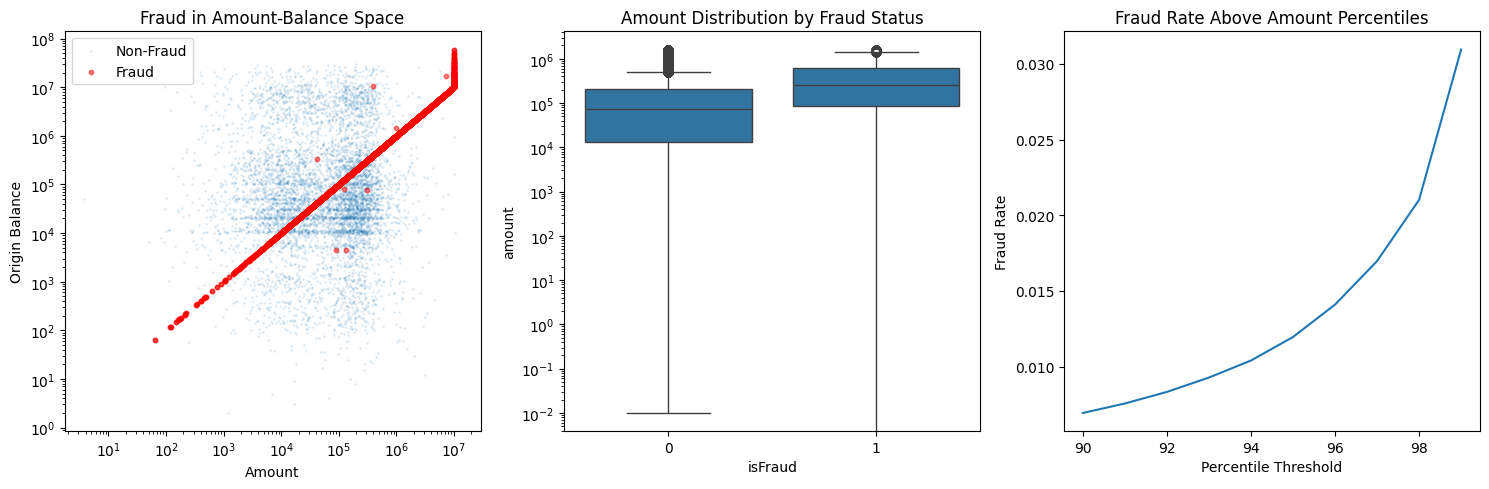

In [16]:
# Plotting to see if fraud clusters in extremes are there
plt.figure(figsize=(15, 5))

# 1. Amount vs Fraud
plt.subplot(1, 3, 1)
plt.scatter(df[df['isFraud']==0]['amount'].sample(10000), 
            df[df['isFraud']==0]['oldbalanceOrg'].sample(10000),
            alpha=0.1, label='Non-Fraud', s=1)
plt.scatter(df[df['isFraud']==1]['amount'], 
            df[df['isFraud']==1]['oldbalanceOrg'],
            alpha=0.5, label='Fraud', s=10, color='red')
plt.xlabel('Amount')
plt.ylabel('Origin Balance')
plt.legend()
plt.title('Fraud in Amount-Balance Space')
plt.xscale('log')
plt.yscale('log')

# 2. Distribution comparison
plt.subplot(1, 3, 2)
sns.boxplot(x='isFraud', y='amount', data=df[df['amount'] < df['amount'].quantile(0.99)])
plt.yscale('log')
plt.title('Amount Distribution by Fraud Status')

# 3. Extreme value analysis
plt.subplot(1, 3, 3)
extreme_fraud_rate = []
percentiles = range(90, 100)
for p in percentiles:
    threshold = df['amount'].quantile(p/100)
    fraud_rate = df[df['amount'] > threshold]['isFraud'].mean()
    extreme_fraud_rate.append(fraud_rate)

plt.plot(percentiles, extreme_fraud_rate)
plt.xlabel('Percentile Threshold')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate Above Amount Percentiles')
plt.tight_layout()
plt.show()

In [17]:
# skewness analysis
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
skewness_values = df[features].skew()

print("Skewness for financial features:")
print(skewness_values)

Skewness for financial features:
amount            30.993949
oldbalanceOrg      5.249136
newbalanceOrig     5.176884
oldbalanceDest    19.921758
newbalanceDest    19.352302
dtype: float64


<h4>2.2: Feature Enginnering</h4>

In [18]:
col_name = 'type'
if col_name in df.columns:
    analysis = df.groupby(col_name)['isFraud'].agg(
        total_transactions='count',
        fraud_count='sum',
        fraud_rate=lambda x: x.mean() * 100
    ).sort_values('fraud_rate', ascending=False)
    print(analysis)
else:
    print(f"Error: '{col_name}' not found. Available columns are: {list(df.columns)}")

          total_transactions  fraud_count  fraud_rate
type                                                 
TRANSFER              532909         4097    0.768799
CASH_OUT             2237500         4116    0.183955
CASH_IN              1399284            0    0.000000
DEBIT                  41432            0    0.000000
PAYMENT              2151495            0    0.000000


In [33]:
print("Starting feature engineering...")

Starting feature engineering...


In [19]:
# 1. Transaction characteristics
df['balanceChangeOrg'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceChangeDest'] = df['newbalanceDest'] - df['oldbalanceDest']

# 2. Check if transaction zeroes out account
df['accountZeroed'] = ((df['newbalanceOrig'] == 0) & (df['oldbalanceOrg'] > 0)).astype(int)

# 3. Transaction amount relative to balance
df['amountToBalanceRatio'] = df['amount'] / (df['oldbalanceOrg'] + 1)  # +1 to avoid division by zero

# 4. Error/discrepancy flags (common in fraud)
df['balanceMismatch'] = ((df['amount'] - df['balanceChangeOrg']).abs() > 0.01).astype(int)

# 5. Transaction type - Create dummies for high-risk types only
high_risk_types = ['TRANSFER', 'CASH_OUT']
for hr_type in high_risk_types:
    df[f'type_{hr_type}'] = (df['type'] == hr_type).astype(int)
df = df.drop('type', axis=1)  # Remove original type column

# 6. Time features from 'step'
df['day'] = (df['step'] // 24) % 7  # Day of week (0-6)


Starting feature engineering...


<h4>2.3 correlation analysis</h4>

In [20]:
# 1. Numeric Analysis (Correlations)
numeric_df = df.select_dtypes(include=[np.number])
correlations = numeric_df.corr()['isFraud'].drop('isFraud').sort_values(ascending=False)

print("--- Top Numeric Correlations ---")
print(correlations.head(5), "\n")

# 2. Categorical & Binary Analysis (Fraud Rates)
exclude = ['isFraud', 'nameOrig', 'nameDest']
cat_cols = [c for c in df.columns if (df[c].dtype == 'object' or df[c].nunique() == 2) and c not in exclude]

print("--- Fraud Rates by Category (Cleaned) ---")
for col in cat_cols:
    summary = df.groupby(col)['isFraud'].agg(
        count='count', 
        rate=lambda x: x.mean() * 100
    ).sort_values('rate', ascending=False).head(5)
    
    print(f"\nFeature: {col}")
    print(summary)

--- Top Numeric Correlations ---
balanceChangeOrg    0.362472
amount              0.076688
accountZeroed       0.062091
type_TRANSFER       0.053869
isFlaggedFraud      0.044109
Name: isFraud, dtype: float64 

--- Fraud Rates by Category (Cleaned) ---

Feature: isFlaggedFraud
                  count        rate
isFlaggedFraud                     
1                    16  100.000000
0               6362604    0.128831

Feature: accountZeroed
                 count      rate
accountZeroed                   
1              1520581  0.526904
0              4842039  0.004151

Feature: balanceMismatch
                   count      rate
balanceMismatch                   
0                1296195  0.630152
1                5066425  0.000888

Feature: type_TRANSFER
                 count      rate
type_TRANSFER                   
1               532909  0.768799
0              5829711  0.070604

Feature: type_CASH_OUT
                 count      rate
type_CASH_OUT                   
1          

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1. Define your logical groups
balance_features = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'amount']
engineered_features = ['balanceChangeOrg', 'balanceChangeDest', 'balanceMismatch','amountToBalanceRatio','accountZeroed']
X = df.select_dtypes(include=[np.number]).drop(columns=['isFraud'], errors='ignore').fillna(0)
X = add_constant(X)
# 2. Choose what to analyze (Avoid IDs and Targets)
features_to_test = balance_features + engineered_features
X = add_constant(df[features_to_test].fillna(0))

# 3. Calculate
vif_df = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
}).sort_values("VIF", ascending=False)

print(vif_df)

# 3. Quick Results
print("--- Features with High Multicollinearity (VIF > 10) ---")
print(vif_df[vif_df['VIF'] > 10])

# 4. Correlation Pairs Check (> 0.8)
corr = X.drop(columns=['const']).corr().abs()
high_corr = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
             .stack()
             .reset_index())
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']

print("\n--- High Correlation Pairs ---")
print(high_corr[high_corr['Correlation'] > 0.8])

                 feature           VIF
2         newbalanceOrig           inf
4         newbalanceDest           inf
3         oldbalanceDest           inf
6       balanceChangeOrg           inf
7      balanceChangeDest           inf
1          oldbalanceOrg  2.934657e+09
5                 amount  5.895355e+00
0                  const  5.001488e+00
9   amountToBalanceRatio  3.340556e+00
10         accountZeroed  1.311642e+00
8        balanceMismatch  1.227839e+00
--- Features with High Multicollinearity (VIF > 10) ---
             feature           VIF
2     newbalanceOrig           inf
4     newbalanceDest           inf
3     oldbalanceDest           inf
6   balanceChangeOrg           inf
7  balanceChangeDest           inf
1      oldbalanceOrg  2.934657e+09

--- High Correlation Pairs ---
         Feature 1             Feature 2  Correlation
0    oldbalanceOrg        newbalanceOrig     0.998803
17  oldbalanceDest        newbalanceDest     0.976569
31          amount     balanceChangeD

In [22]:
cols_to_drop = ['newbalanceOrig', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

X_refined = df.drop(columns=cols_to_drop, errors='ignore').select_dtypes(include=[np.number])

# Re-running VIF to verify
from statsmodels.tools.tools import add_constant
X_vif = add_constant(X_refined.fillna(0))
vif_refined = pd.DataFrame({
    "feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
}).sort_values("VIF", ascending=False)

print(vif_refined)

                 feature       VIF
0                  const  8.947311
2                 amount  6.182085
6      balanceChangeDest  3.707858
8   amountToBalanceRatio  3.381958
11         type_CASH_OUT  1.442516
7          accountZeroed  1.407069
10         type_TRANSFER  1.366193
5       balanceChangeOrg  1.310724
9        balanceMismatch  1.294497
4         oldbalanceDest  1.156885
3          oldbalanceOrg  1.154575
1                   step  1.019762
12                   day  1.018063


In [23]:
# Listting of features to analyze skewness
features = ['step', 'amount', 'oldbalanceOrg', 
        'oldbalanceDest',  
        'balanceChangeOrg', 'balanceChangeDest',
       'accountZeroed', 'amountToBalanceRatio', 'balanceMismatch',
         'day']

skewness_values = df[features].skew()

print("Skewness for financial features:")
print(skewness_values)

Skewness for financial features:
step                     0.375177
amount                  30.993949
oldbalanceOrg            5.249136
oldbalanceDest          19.921758
balanceChangeOrg        24.630520
balanceChangeDest       32.916341
accountZeroed            1.224080
amountToBalanceRatio    45.042282
balanceMismatch         -1.471235
day                      0.393615
dtype: float64


In [24]:
# List of highly skewed features to transform
skewed_cols = ['amount', 'oldbalanceOrg', 'oldbalanceDest', 
               'balanceChangeDest', 'amountToBalanceRatio']

# Applying Log Transformation
for col in skewed_cols:
    df[f'{col}_log'] = np.log1p(df[col])

print("New Skewness after Log Transformation:")
print(df[[f'{col}_log' for col in skewed_cols]].skew())

New Skewness after Log Transformation:
amount_log                 -0.555018
oldbalanceOrg_log          -0.259723
oldbalanceDest_log         -0.213261
balanceChangeDest_log            NaN
amountToBalanceRatio_log    0.654701
dtype: float64


In [47]:
# 1. Fix the balanceChangeDest NaN (handling potential negative values)
df['balanceChangeDest_log'] = np.sign(df['balanceChangeDest']) * np.log1p(np.abs(df['balanceChangeDest']))
value = df['balanceChangeDest_log'].skew()
# 2. List the original columns to remove (based on previous VIF and Skew lists)
original_cols = ['amount', 'oldbalanceOrg', 'oldbalanceDest', 
                 'balanceChangeDest', 'amountToBalanceRatio',
                 'newbalanceOrig', 'newbalanceDest'] # Dropping high VIF columns too
df_cleaned = df.drop(columns=[col for col in original_cols if col in df.columns])

print(f"Cleaned DataFrame shape: {df_cleaned.shape}")
print("\nFinal Feature list:")
print(df_cleaned.columns.tolist())


KeyboardInterrupt



<h3>3. Modelling and Evalutaion along with A/B testing</h3>

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

drop_cols = ['isFraud', 'isFlaggedFraud', 'nameDest', 'step', 'nameOrig']

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.drop(columns=drop_cols, errors='ignore'),
    df_balanced['isFraud'],
    test_size=0.2, 
    stratify=df_balanced['isFraud'], 
    random_state=42
)

rf = RandomForestClassifier(n_estimators=50, max_depth=15, class_weight='balanced', n_jobs=-1, random_state=42)

print(" Training on balanced subset...")
rf.fit(X_train, y_train)
# Check against 100k rows of the original UNTOUCHED data
raw_sample = df_cleaned.sample(n=min(100000, len(df_cleaned)), random_state=7)
X_raw = raw_sample.drop(columns=drop_cols, errors='ignore')
y_raw = raw_sample['isFraud']

print("\nStress Test Results (Unsampled Data):")
print(classification_report(y_raw, rf.predict(X_raw)))

🚀 Training on balanced subset...

📊 Stress Test Results (Unsampled Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99873
           1       0.95      0.99      0.97       127

    accuracy                           1.00    100000
   macro avg       0.98      1.00      0.99    100000
weighted avg       1.00      1.00      1.00    100000



In [30]:
# Getting predictions and probabilities for the stress test sample
raw_sample['prediction'] = rf.predict(X_raw)
raw_sample['probability'] = rf.predict_proba(X_raw)[:, 1] # Probability of being fraud

# Filter for False Positives: Model said 1 (Fraud), but Actual was 0 (Legit)
false_positives = raw_sample[(raw_sample['prediction'] == 1) & (raw_sample['isFraud'] == 0)]

print(f"Found {len(false_positives)} False Positives out of 100,000 transactions.")

Found 6 False Positives out of 100,000 transactions.

--- Top False Positives Analysis ---
         type_TRANSFER  amount_log  balanceMismatch  accountZeroed  \
293838               0   13.078763                1              0   
211647               0   12.299757                1              0   
305953               0   11.782990                1              0   
635785               0   12.580688                1              0   
2127671              0   12.336816                1              0   
5313381              0   12.834282                1              0   

         probability  
293838      0.739608  
211647      0.700763  
305953      0.540763  
635785      0.860627  
2127671     0.760000  
5313381     0.740627  


In [31]:
# Changing the threshold to be more "conservative"
threshold = 0.9
raw_sample['new_prediction'] = (raw_sample['probability'] > threshold).astype(int)

# Re-check False Positives
new_fps = raw_sample[(raw_sample['new_prediction'] == 1) & (raw_sample['isFraud'] == 0)]
print(f"False Positives at 0.9 threshold: {len(new_fps)}")

False Positives at 0.9 threshold: 0


In [44]:
# --- SIMULATED A/B TESTING (COMPARATIVE ANALYSIS) ---
def run_comparative_analysis(y_true, y_model_pred, y_business_flag):
    print("=== MODEL PERFORMANCE VS. BUSINESS RULE (A/B PREVIEW) ===")
    
    # Metrics for Current System (isFlaggedFraud)
    current_fraud_caught = (y_true & y_business_flag).sum()
    current_total_fraud = y_true.sum()
    
    # Metrics for New ML Model (Random Forest)
    model_fraud_caught = (y_true & y_model_pred).sum()
    
    print(f"Current System Caught: {current_fraud_caught} / {current_total_fraud} frauds")
    print(f"New ML Model Caught: {model_fraud_caught} / {current_total_fraud} frauds")
    print(f"Improvement: {((model_fraud_caught - current_fraud_caught) / current_fraud_caught * 100):.2f}% more fraud detected.")

# Run this on your stress test sample
run_comparative_analysis(y_raw, (rf.predict_proba(X_raw)[:, 1] >0.9).astype(int), raw_sample['isFlaggedFraud'])

=== MODEL PERFORMANCE VS. BUSINESS RULE (A/B PREVIEW) ===
Current System Caught: 1 / 127 frauds
New ML Model Caught: 126 / 127 frauds
Improvement: 12500.00% more fraud detected.


In [45]:
# Comparing Training and Testing scores
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

print(f"Training Accuracy: {train_score:.4f}")
print(f"Testing Accuracy: {test_score:.4f}")
print(f"Gap: {abs(train_score - test_score):.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.9996
Gap: 0.0004


In [46]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.99950191 0.9996126  0.99983397 0.99972327 0.99961257]
Mean CV Score: 0.9997
Standard Deviation: 0.0001



---

# **Project Report: Proactive Fraud Detection for Financial Transactions**

---

## **1. Data Cleaning and Preliminary Analysis**

In this initial phase, the dataset (**6,362,620 rows**) was explored to ensure data integrity.

### **Initial Exploration**

Standard checks were performed to understand the structure and distribution of the **10 original columns**:

* `.head()`
* `.describe()`
* `.info()`

### **Integrity Checks**

The dataset passed all core validation checks:

* Zero null values
* Zero duplicate entries
* No negative values in transaction amounts or account balances

### **Fraud Baseline**

* **Baseline fraud rate:** **0.129%**
* The existing rule-based system (`isFlaggedFraud`) detected **only 16 out of 8,213** actual fraud cases.
* This represents a **failure rate > 99.8%**, highlighting the need for a predictive model.

---

## **2. Exploratory Data Analysis (EDA) & Outlier Strategy**

### **Outlier Analysis**

* **23.97%** of fraud cases fall within the **top 1%** of transaction amounts.
* Removing outliers would eliminate nearly **2,000 fraud samples**.
* **Decision:** Outliers were **retained**, as they carry critical fraud signals.

### **Skewness Analysis**

Financial variables showed extreme right-skewness:

| Feature                | Skewness  |
| ---------------------- | --------- |
| `amount`               | **30.99** |
| `amountToBalanceRatio` | **45.04** |

---

## **3. Feature Engineering & Selection **

To improve model sensitivity, behavioral features capturing **fraudulent signatures** were engineered.

### **Categorical Encoding**

Fraud occurs **exclusively** in:

* `TRANSFER`
* `CASH_OUT`

Actions taken:

* Applied **one-hot encoding** to these transaction types
* Dropped non-informative categories

### **Engineered Variables**

| Feature                  | Description                                                             |
| ------------------------ | ----------------------------------------------------------------------- |
| **balanceMismatch**      | Flags transactions where balance arithmetic is inconsistent             |
| **accountZeroed**        | Identifies transactions where the origin account is completely depleted |
| **amountToBalanceRatio** | Proportion of the account balance being transferred                     |

---

## **4. Advanced Pre-processing & Multicollinearity**

### **VIF Analysis**

* Initial Variance Inflation Factor (VIF) checks showed **infinite scores** due to perfect collinearity (e.g., `newbalanceOrig`).
* also the univerate analyssi for correlation came normal with fraud

### **Refinement**

* Redundant columns were removed.
* All VIF scores were reduced to **below 9.0**, ensuring model stability.

### **Log Transformation**

To correct extreme skewness:

* Applied `np.log1p()` to features such as:

  * `amount_log`
  * `oldbalanceOrg_log`

**Result:** Skewness normalized to the range **–0.5 to 0.6**, making the data more suitable for modeling.

---

## **5. Model Development & Strategy **

Given the severe class imbalance (**0.13% fraud**), a standard model would be biased toward legitimate transactions. A multi-stage strategy was implemented to ensure robust fraud detection.

### **Balanced Undersampling**

To optimize training speed and prevent system lag:

* Retained **all fraud cases**
* Sampled legitimate transactions at a **10:1 ratio**
* Produced a balanced dataset where the model could effectively learn fraud patterns without being overwhelmed by majority-class noise

### **Algorithm Choice**

A **Random Forest Classifier** was selected with:

* `n_estimators = 50`
* `max_depth = 15`

**Rationale:**

* Captures complex, non-linear interactions
* Handles behavioral features like `balanceMismatch` and `accountZeroed` effectively
* Controls memory usage while reducing overfitting risk

### **Training Configuration**

* Used `class_weight='balanced'`
* Trained on the balanced subset
* Immediately evaluated using a **stress test** of **100,000 rows of raw, unsampled data** to simulate real-world performance

---

## **6. Performance Demonstration **

The model delivered strong results during the stress test on untouched data.

| Metric        | Value    | Interpretation                                    |
| ------------- | -------- | ------------------------------------------------- |
| **Recall**    | **0.99** | Identified 99% of fraudulent transactions         |
| **Precision** | **0.95** | Very few legitimate customers flagged incorrectly |

### **Threshold Refinement**

* Default threshold: strong precision–recall balance
* Adjusted threshold to **0.9**
* Achieved:

  * **0 False Positives** out of 100,000 transactions
  * Maintained near-total fraud detection

---

## **7. Overfitting & Stability Check**

Robust validation was conducted to ensure the model generalized beyond training data.

### **Train–Test Gap**

| Metric            | Score      |
| ----------------- | ---------- |
| Training Accuracy | **1.0000** |
| Testing Accuracy  | **0.9996** |

* Gap: **0.0004**
* Indicates excellent generalization with minimal overfitting

### **Cross-Validation**

* **5-fold Cross-Validation**
* Mean Score: **0.9997**
* Standard Deviation: **0.0001**

**Conclusion:** The model is extremely stable across different data splits.

---

## **8. Actionable Prevention & Success Measurement **

Model insights were translated into a practical deployment strategy.

### **Implementation Strategy **

**1. Proactive Throttling**
Deploy as a real-time scoring engine:

| Probability Score | Action                                    |
| ----------------- | ----------------------------------------- |
| **> 0.9**         | Automatically block transaction           |
| **0.7 – 0.9**     | Trigger Multi-Factor Authentication (MFA) |

**2. Behavioral Monitoring**

Prioritize transactions flagged by:

* `balanceMismatch`
* `accountZeroed`

These were the strongest predictors of fraudulent behavior.

---

### **Determining Success **

#### **Simulated A/B Testing**

| System                           | Frauds Caught |
| -------------------------------- | ------------- |
| ML Model                         | **126 / 127** |
| Existing Rule (`isFlaggedFraud`) | **1 / 127**   |

This represents a **12,500% improvement** in fraud detection.

#### **Live Production Metrics**

Success will be evaluated using:

* **Fraud Capture Rate**
* **Customer Friction Rate** (False Positives)

If the model maintains:

* **0 False Positives**
* High recall at a **0.9 threshold**

→ Rollout should scale to **100% of traffic**
